<a href="https://colab.research.google.com/github/Siryeong/MachineLearning/blob/main/ml_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download

In [4]:
### data Download
!wget http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

--2021-10-24 21:54:26--  http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  15.5MB/s    in 1.0s    

2021-10-24 21:54:27 (15.5 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [2]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
#import scipy.misc
from PIL import Image

### definition
def load_data(dataset):
  ''' Loads the dataset

  :type dataset: string
  :param dataset: the path to the dataset (here MNIST)
  
  copied from http://deeplearning.net/ and revised by hchoi
  '''

  # Download the MNIST dataset if it is not present
  data_dir, data_file = os.path.split(dataset)
  if data_dir == "" and not os.path.isfile(dataset):
    # Check if dataset is in the data directory.
    new_path = os.path.join(
      os.path.split(__file__)[0],
      dataset
    )
    if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
      dataset = new_path

  if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
    from six.moves import urllib
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)

  print('... loading data')

  # Load the dataset
  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  return train_set, valid_set, test_set

# Load Data

In [5]:
train_set, val_set, test_set = load_data('mnist.pkl.gz')
train_x, train_y = train_set

print(train_x.shape)
print(train_y.shape)

... loading data
(50000, 784)
(50000,)


# PCA Implementation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

def myPCA(data, n_dim=2):
  # centered X
  X = StandardScaler().fit_transform(data)

  # get covariance matrix
  cov_mat = np.cov(X.T)

  # get eigen vecters
  eig_vals, eig_vecs = LA.eig(cov_mat)

  pc = [np.dot(data, eig_vecs.T[i]) for i in range(n_dim)]

  return pc

In [236]:
import pandas as pd

pc = myPCA(train_x)
reduced = pd.DataFrame(pc[0], columns=['pc1'])
reduced['pc2'] = pc[1]
reduced['label'] = train_y
reduced.head(5)

,pc1,pc2,label
0,2.217290,1.884202,5
1,5.705127,3.519756,0
2,2.485265,-1.039833,4
3,-0.032545,1.897159,1
4,0.644373,-0.121695,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


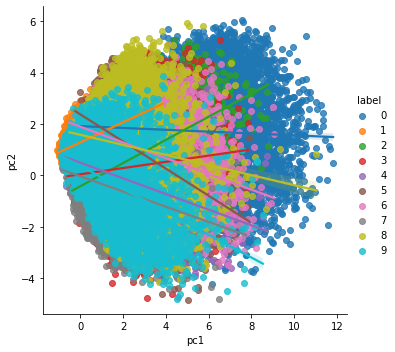

In [237]:
import seaborn as sns

sns.lmplot('pc1', 'pc2', data=reduced, hue='label')

# LDA Implementation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

def myLDA(data, label, n_dim=2):

  ### classification
  class_means = np.zeros((10, 784))
  for i in range(10):
    class_means[i] = data[label==i].mean(axis=0)
  global_mean = data.mean()

  ### get within scatter
  within_scatter = np.zeros((784, 784))
  si = np.zeros((784, 784))
  for i in range(10):
    for x in data[label==i]:
      tmp = (x - class_means[i]).reshape(784,1)
      si += np.dot( tmp, tmp.T )
    within_scatter += si

  ### get between scatter
  between_scatter = np.zeros((784, 784))
  for i in range(10):
    n = len(data[label==i])
    tmp = (class_means[i] - global_mean).reshape(784,1)
    between_scatter += n * np.dot( tmp, tmp.T )

  within_scatter += np.eye(784)
  within_inv = LA.inv(within_scatter)

  eig_vals, eig_vecs = LA.eig( np.dot(within_inv, between_scatter) )

  ld = [np.dot(data, eig_vecs.T[i]) for i in range(n_dim)]

  return ld

In [9]:
ld = myLDA(train_x, train_y)

In [14]:
import pandas as pd

reduced = pd.DataFrame(ld[0].real, columns=['ld1'])
reduced['ld2'] = ld[1].real
reduced['label'] = train_y
reduced.head(5)

,ld1,ld2,label
0,0.000478,-0.037383,5
1,0.000042,-0.050347,0
2,-0.000132,0.080781,4
3,0.000022,-0.068543,1
4,-0.000217,0.313648,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


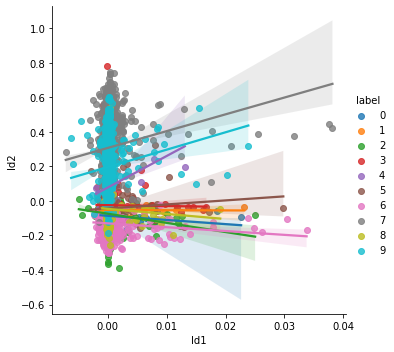

In [16]:
import seaborn as sns

sns.lmplot('ld1', 'ld2', data=reduced, hue='label')